In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('car_models.csv', sep=',')

In [3]:
import numpy as np 
np.set_printoptions(threshold=10000,suppress=True) 
import pandas as pd 
import warnings 
import matplotlib.pyplot as plt 
import matplotlib
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [4]:
data.head()

,models,Brand,year,Average Urban Consumption,Average extra-urban consumption,Average mixed consumption,Average of CO2 (g per km),Average CO type I
0,Ford Fiesta Sedan 2012,Ford,2012,4.900000,3.600,4.100000,107.000000,0.421
1,FIAT 500 Convertible 2012,FIAT,2012,5.725000,4.175,4.775000,111.000000,0.318
2,Chevrolet Corvette ZR1 2012,Chevrolet,2012,19.000000,8.900,12.600000,293.000000,0.508
3,Lamborghini Gallardo LP 570-4 Superleggera 2012,Lamborghini,2012,21.406667,9.860,14.086667,337.133333,0.000
4,Honda Accord Coupe 2012,Honda,2012,6.900000,4.500,5.400000,141.000000,0.215


In [5]:
X = data.iloc[:,2:]

In [6]:
meandata = data.groupby(by='Brand').mean()

In [7]:
meandata.sort_values(by='Average of CO2 (g per km)')

,year,Average Urban Consumption,Average extra-urban consumption,Average mixed consumption,Average of CO2 (g per km),Average CO type I
Brand,,,,,,
Land,2012.000000,11.521470,6.603816,8.401553,101.000000,0.211767
AM,2000.000000,11.521470,6.603816,8.401553,106.000000,0.211767
FIAT,2012.000000,5.725000,4.175000,4.775000,111.000000,0.318000
Rolls-Royce,2012.000000,11.521470,6.603816,8.401553,122.666667,0.211767
Plymouth,1999.000000,11.521470,6.603816,8.401553,126.000000,0.211767
Toyota,2012.000000,6.314286,4.574790,5.214286,129.142857,0.235807
GMC,2012.000000,11.521470,6.603816,8.401553,130.000000,0.211767
Spyker,2009.000000,11.521470,6.603816,8.401553,131.000000,0.211767
Hyundai,2012.000000,6.679487,4.674359,5.405128,136.538462,0.279333


In [8]:
X.iloc[:,-1]

0     0.421000
1     0.318000
2     0.508000
3     0.000000
4     0.215000
        ...   
95    0.211767
96    0.211767
97    0.211767
98    0.211767
99    0.211767
Name: Average CO type I, Length: 100, dtype: float64

In [10]:
X.iloc[:,2:] = X.iloc[:,2:].astype(float)

In [11]:
X = X.fillna(X.mean())

In [12]:
SS = StandardScaler()
SS.fit(X)
Xnorm = SS.transform(X)

In [13]:
from sklearn.decomposition import PCA

pca = PCA() # 0.9 pour garder 90% des infos
pca.fit(Xnorm)
component = pca.components_
X_pca = pca.transform(Xnorm)

variance = pca.explained_variance_ratio_
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
print(var)

[ 64.6  86.   97.4  99.8 100.  100. ]


In [14]:
print("Première composante : ", component[0])
print("Deuxième composante : ", component[1])

Première composante :  [-0.00800143  0.50358623  0.50210245  0.50455597  0.47709406  0.10970211]
Deuxième composante :  [ 0.72759972 -0.00795542 -0.03120085 -0.0183575  -0.08348308  0.6798937 ]


In [15]:
col = X.columns
len(col)

6

In [16]:
compo0 = component[0]
compo1 = component[1]


ind0P = np.where(compo0 > 1 / np.sqrt(6))
ind0N = np.where(compo0 < - 1 / np.sqrt(6))
ind1P = np.where(compo1 > 1 / np.sqrt(6))
ind1N = np.where(compo1 < - 1 / np.sqrt(6))

print('pos',col[ind0P], 'neg', col[ind0N])
print('pos',col[ind1P], 'neg', col[ind1N])

pos Index(['Average Urban Consumption', 'Average extra-urban consumption',
       'Average mixed consumption', 'Average of CO2 (g per km)'],
      dtype='object') neg Index([], dtype='object')
pos Index(['year', 'Average CO type I'], dtype='object') neg Index([], dtype='object')


In [17]:
X_test = pd.DataFrame(X_pca, columns=['Première composante','Deuxième composante','Troisième composante','Quatrième composante','4','5' ])
X_test['Brand'] = data['Brand'].tolist()

In [18]:
import seaborn as sns

<Figure size 1080x1080 with 0 Axes>

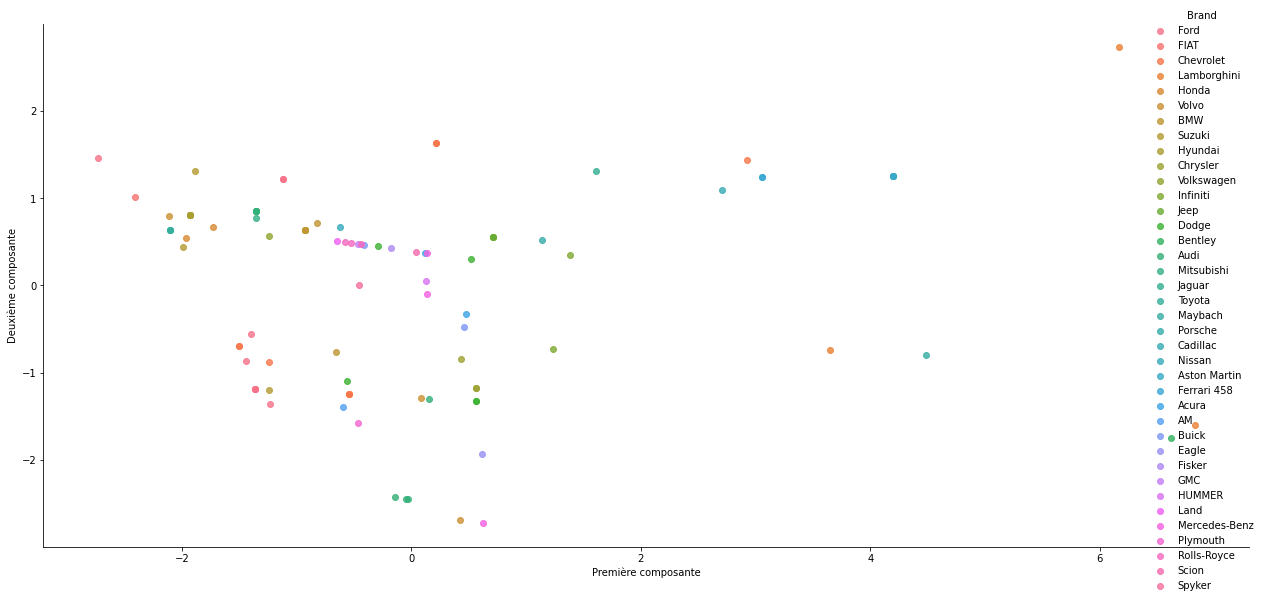

In [19]:

plt.figure(figsize=(15,15))
sns.lmplot('Première composante', 'Deuxième composante', data=X_test, hue='Brand', height=8, aspect=2, fit_reg= False)
plt.tight_layout()

plt.show()

In [20]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from matplotlib.pyplot import figure

In [21]:
X_test['models'] = data['models']

In [22]:
X_test = X_test.drop(columns='Brand')

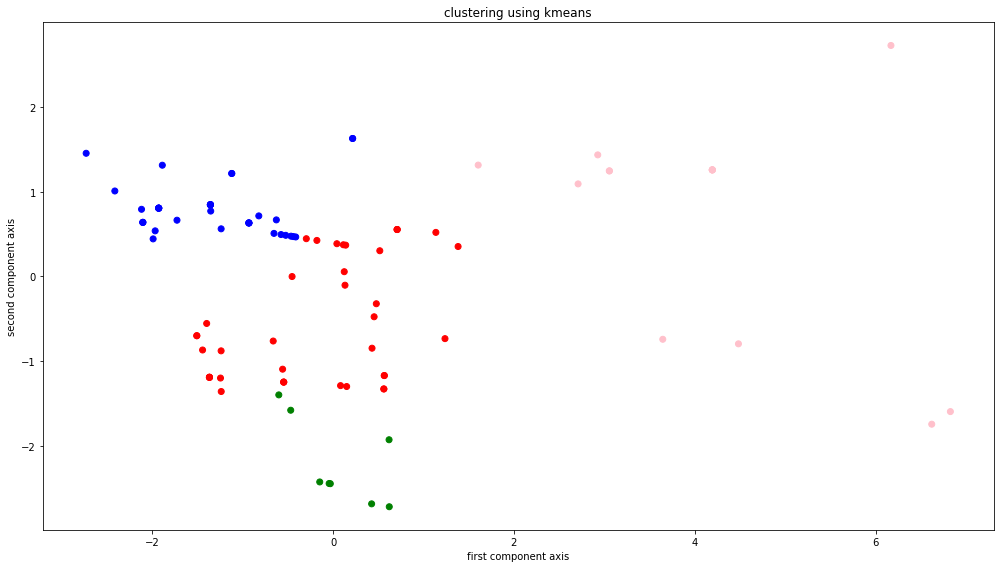

In [106]:
figure(figsize=(14,8))
clustering = KMeans(n_clusters = 4)
kmeans = clustering.fit(X_test.drop(columns = 'models'))
clustering = kmeans.labels_ 
colors = ['red','pink','blue', 'green']
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors)) 
for label, x, y in zip(X_test['models'], X_test.iloc[:, 0], X_test.iloc[:, 1]): 
    plt.xlabel('first component axis')
    plt.ylabel('second component axis')
    plt.title('clustering using kmeans')
    #plt.annotate(label, xy=(x,y), textcoords="offset points")
plt.tight_layout()
plt.show()

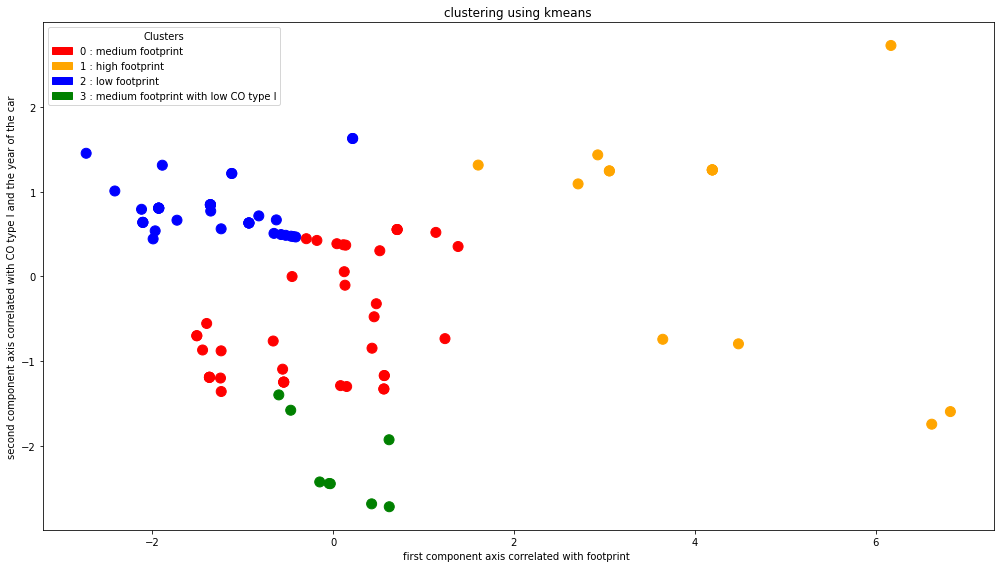

In [138]:
figure(figsize=(14,8))
import matplotlib.patches as mpatches
colors = ['red','orange','blue', 'green']
scatter = plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors), s=100)
pop_a = mpatches.Patch(color='red', label='0 : medium footprint')
pop_b = mpatches.Patch(color='orange', label='1 : high footprint')
pop_c = mpatches.Patch(color='blue', label='2 : low footprint')
pop_d = mpatches.Patch(color='green', label='3 : medium footprint with low CO type I')


for label, x, y in zip(X_test['models'], X_test.iloc[:, 0], X_test.iloc[:, 1]): 
    plt.xlabel('first component axis correlated with footprint ')
    plt.ylabel('second component axis correlated with CO type I and the year of the car')
    plt.title('clustering using kmeans')
    #plt.annotate(label, xy=(x,y), textcoords="offset points")
    #plt.legend(*scatter.legend_elements(),loc="lower left", title="Classes")
    plt.legend(handles=[pop_a,pop_b, pop_c, pop_d], title = 'Clusters')
plt.tight_layout()
plt.show()

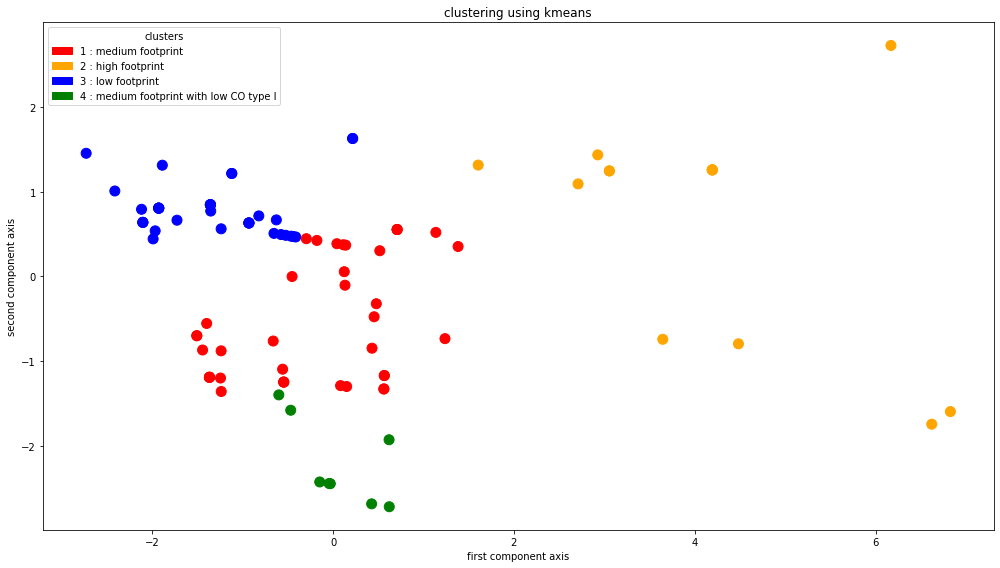

In [136]:
figure(figsize=(14,8))
import matplotlib.patches as mpatches
colors = ['red','orange','blue', 'green']
scatter = plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors), s=100)
pop_a = mpatches.Patch(color='red', label='1 : medium footprint')
pop_b = mpatches.Patch(color='orange', label='2 : high footprint')
pop_c = mpatches.Patch(color='blue', label='3 : low footprint')
pop_d = mpatches.Patch(color='green', label='4 : medium footprint with low CO type I')

for label, x, y in zip(X_test['models'], X_test.iloc[:, 0], X_test.iloc[:, 1]): 
    plt.xlabel('first component axis')
    plt.ylabel('second component axis')
    plt.title('clustering using kmeans')
    #plt.annotate(label, xy=(x,y), textcoords="offset points")
    #plt.legend(*scatter.legend_elements(),loc="lower left", title="Classes")
    plt.legend(handles=[pop_a,pop_b, pop_c, pop_d], title='clusters')
plt.tight_layout()
plt.show()

In [107]:
cluster_map = pd.DataFrame()
cluster_map['models'] = data['models']
cluster_map['cluster'] = clustering

In [108]:
cluster_map1 = cluster_map.loc[cluster_map['cluster']==0,:]
cluster_map2 = cluster_map.loc[cluster_map['cluster']==1,:]
cluster_map3 = cluster_map.loc[cluster_map['cluster']==2,:]
cluster_map4 = cluster_map.loc[cluster_map['cluster']==3,:]

In [109]:
cluster_map

,models,cluster
0,Ford Fiesta Sedan 2012,2
1,FIAT 500 Convertible 2012,2
2,Chevrolet Corvette ZR1 2012,1
3,Lamborghini Gallardo LP 570-4 Superleggera 2012,1
4,Honda Accord Coupe 2012,2
...,...,...
95,Rolls-Royce Phantom Sedan 2012,2
96,Rolls-Royce Phantom Drophead Coupe Convertible...,2
97,Scion xD Hatchback 2012,0
98,Spyker C8 Coupe 2009,0


In [110]:
cluster_map.to_csv('clusters.csv')

In [111]:
print('first cluster :', list(cluster_map1['models'].values), '\n')
print('second cluster :', list(cluster_map2['models'].values), '\n')
print('third cluster :', list(cluster_map3['models'].values), '\n')
print('fourth cluster :', list(cluster_map4['models'].values), '\n')

first cluster : ['Ford F-150 Regular Cab 2007', 'Chrysler Crossfire Convertible 2008', 'Suzuki Aerio Sedan 2007', 'Chrysler PT Cruiser Convertible 2008', 'Ford Ranger SuperCab 2011', 'Infiniti G Coupe IPL 2012', 'Jeep Wrangler SUV 2012', 'Chevrolet TrailBlazer SS 2009', 'Dodge Durango SUV 2007', 'Volvo XC90 SUV 2007', 'Ford Mustang Convertible 2007', 'Ford Freestar Minivan 2007', 'Chevrolet Express Van 2007', 'Ford GT Coupe 2006', 'Chevrolet Cobalt SS 2010', 'BMW M5 Sedan 2010', 'Jeep Grand Cherokee SUV 2012', 'Ford Expedition EL SUV 2009', 'Chevrolet Malibu Sedan 2007', 'Audi S4 Sedan 2007', 'Ford Focus Sedan 2007', 'Chevrolet Silverado 1500 Classic Extended Cab 2007', 'Chrysler 300 SRT-8 2010', 'Porsche Panamera Sedan 2012', 'Chevrolet HHR SS 2010', 'Dodge Magnum Wagon 2008', 'Infiniti QX56 SUV 2011', 'Dodge Caliber Wagon 2007', 'Jeep Liberty SUV 2012', 'Acura TL Type-S 2008', 'Acura ZDX Hatchback 2012', 'Buick Rainier SUV 2007', 'Dodge Caliber Wagon 2012', 'Dodge Charger Sedan 2012'